In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Convolution1D, GlobalMaxPooling1D
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 250
nb_filter = 250
filter_length = 3
hidden_dims = 250
nb_epoch = 2

In [17]:
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')
print(X_train[1])

Loading data...
25000 train sequences
25000 test sequences
[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [19]:
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
X_train shape: (25000, 400)
X_test shape: (25000, 400)


In [5]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen,
                    dropout=0.2))
model.add(Convolution1D(nb_filter=nb_filter,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train,
          batch_size=batch_size,
          nb_epoch=nb_epoch,
          validation_split=0.1)

Build model...


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:91: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22500 samples, validate on 2500 samples
Epoch 1/2
22500/22500 [==============================] - 468s - loss: 0.4191 - acc: 0.7968 - val_loss: 0.2948 - val_acc: 0.8852

In [6]:
score = model.evaluate(X_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

25000/25000 [==============================] - 129s     

In [11]:
out = model.predict_classes(X_test)

25000/25000 [==============================] - 135s     

In [16]:
from sklearn.metrics import *
print(confusion_matrix(y_test, out))

[[10900  1600]
 [ 1174 11326]]


In [15]:
print(classification_report(y_test, out))

             precision    recall  f1-score   support

          0       0.90      0.87      0.89     12500
          1       0.88      0.91      0.89     12500

avg / total       0.89      0.89      0.89     25000



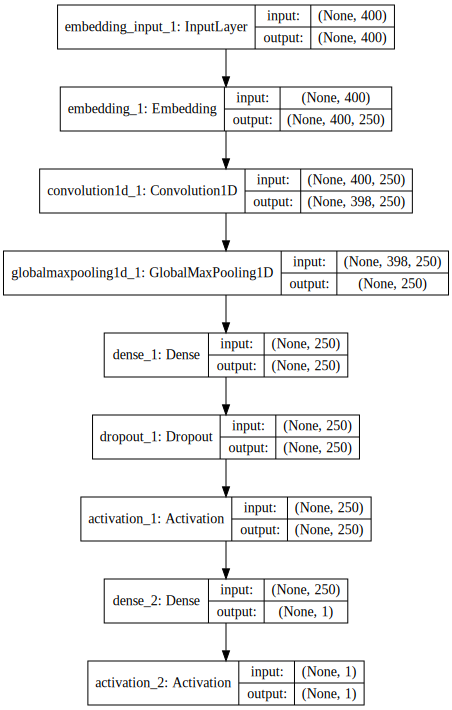

In [8]:
%matplotlib inline
from IPython.display import SVG
from matplotlib import pyplot as plt
from keras.utils.visualize_util import model_to_dot, plot
plt.style.use("ggplot")
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))